# 神经网络
用图来表示神经网络的话，如图 3-1 所示。我们把最左边的一列称为**输入层**，最右边的一列称为**输出层**，中间的一列称为**中间层**。中间层有时也称为**隐藏层**。“隐藏”一词的意思是，隐藏层的神经元（和输入层、输出层不同）肉眼看不见。

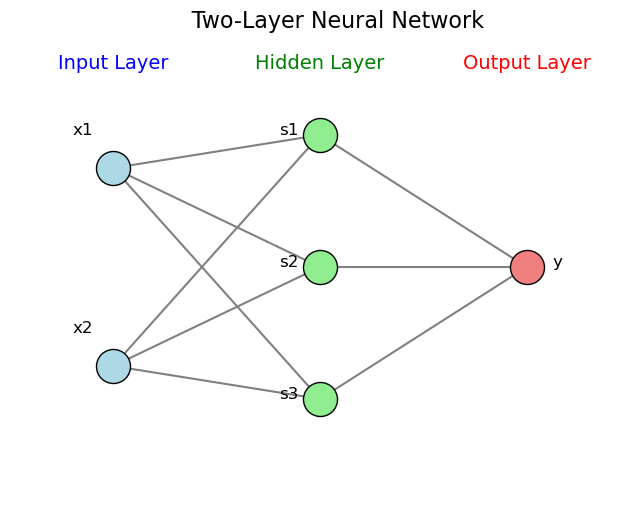

In [19]:
import matplotlib.pyplot as plt

def draw_neural_network_adjusted_labels():
    fig, ax = plt.subplots(figsize=(8, 6))

    # Define node positions
    layer_0 = [(0, 0.8), (0, 0.2)]  # x1, x2
    layer_1 = [(2, 0.9), (2, 0.5), (2, 0.1)]  # s1, s2, s3
    layer_2 = [(4, 0.5)]  # y

    # Add layer labels
    ax.text(0, 1.1, "Input Layer", fontsize=14, ha='center', color='blue')
    ax.text(2, 1.1, "Hidden Layer", fontsize=14, ha='center', color='green')
    ax.text(4, 1.1, "Output Layer", fontsize=14, ha='center', color='red')

    # Draw layer 0 (input layer x)
    for i, (x, y) in enumerate(layer_0):
        ax.scatter(x, y, s=600, color='lightblue', edgecolor='black', zorder=5)
        ax.text(x - 0.3, y + 0.1, f"x{i+1}", fontsize=12, ha='center')  # Adjusted position

    # Draw layer 1 (hidden layer s)
    for i, (x, y) in enumerate(layer_1):
        ax.scatter(x, y, s=600, color='lightgreen', edgecolor='black', zorder=5)
        ax.text(x - 0.3, y, f"s{i+1}", fontsize=12, ha='center')

    # Draw layer 2 (output layer y)
    for x, y in layer_2:
        ax.scatter(x, y, s=600, color='lightcoral', edgecolor='black', zorder=5)
        ax.text(x + 0.3, y, "y", fontsize=12, ha='center')

    # Connect layer 0 to layer 1
    for x1, y1 in layer_0:
        for x2, y2 in layer_1:
            ax.plot([x1, x2], [y1, y2], color='gray', linestyle='-', zorder=1)

    # Connect layer 1 to layer 2
    for x1, y1 in layer_1:
        for x2, y2 in layer_2:
            ax.plot([x1, x2], [y1, y2], color='gray', linestyle='-', zorder=1)

    # Set coordinate range
    ax.set_xlim(-1, 5)
    ax.set_ylim(-0.2, 1.2)

    # Remove axes
    ax.axis('off')
    plt.title("     Two-Layer Neural Network", fontsize=16)
    plt.show()

# Call the drawing function
draw_neural_network_adjusted_labels()

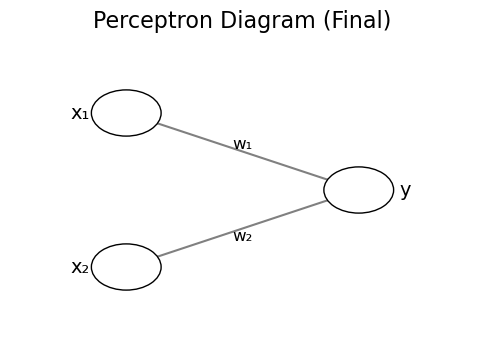

In [27]:
import matplotlib.pyplot as plt

def draw_perceptron_diagram_final():
    fig, ax = plt.subplots(figsize=(6, 4))

    # Define positions of nodes
    x1_position = (0, 1)
    x2_position = (0, -1)
    y_position = (2, 0)

    # Draw circles (nodes)
    circle_radius = 0.3  # Radius of the circles
    circle_kwargs = {'color': 'white', 'ec': 'black', 'zorder': 5}  # Circle styling

    ax.add_artist(plt.Circle(x1_position, circle_radius, **circle_kwargs))
    ax.text(x1_position[0] - 0.4, x1_position[1], 'x₁', fontsize=14, ha='center', va='center')  # Adjust text position

    ax.add_artist(plt.Circle(x2_position, circle_radius, **circle_kwargs))
    ax.text(x2_position[0] - 0.4, x2_position[1], 'x₂', fontsize=14, ha='center', va='center')  # Adjust text position

    ax.add_artist(plt.Circle(y_position, circle_radius, **circle_kwargs))
    ax.text(y_position[0] + 0.4, y_position[1], 'y', fontsize=14, ha='center', va='center')  # Adjust text position

    # Draw edges with weights
    ax.annotate('', xy=y_position, xytext=x1_position,
                arrowprops=dict(facecolor='gray', edgecolor='gray', arrowstyle='->', lw=1.5))
    ax.text(1, 0.6, 'w₁', fontsize=12, ha='center', va='center')

    ax.annotate('', xy=y_position, xytext=x2_position,
                arrowprops=dict(facecolor='gray', edgecolor='gray', arrowstyle='->', lw=1.5))
    ax.text(1, -0.6, 'w₂', fontsize=12, ha='center', va='center')

    # Adjust plot limits and remove axes
    ax.set_xlim(-1, 3)
    ax.set_ylim(-2, 2)
    ax.axis('off')
    plt.title("Perceptron Diagram", fontsize=16)
    plt.show()

# Call the function to draw the diagram
draw_perceptron_diagram_final()

上图中的感知机接收 $x_1$ 和 $x_2$ 两个输入信号, 输出 $y$ 。如果用数学式来表示上图中的感知机：

$$
y= \begin{cases}0 & \left(b+w_1 x_1+w_2 x_2 \leqslant 0\right) \\ 1 & \left(b+w_1 x_1+w_2 x_2>0\right)\end{cases}
$$

$b$ 是被称为偏置的参数，用于控制神经元被激活的容易程度；而 $w_1$ 和 $w_2$是表示各个信号的权重的参数，用于控制各个信号的重要性。

为了简化上式，我们用一个函数来表示这种分情况的动作（超过 0 则输出 1 ，否则输出 0）。引入新函数 $h(x)$。

$$
y=h\left(b+w_1 x_1+w_2 x_2\right)
$$

$$
h(x)= \begin{cases}0 & (x \leqslant 0) \\ 1 & (x>0)\end{cases}
$$

## 激活函数
激活函数（Activation Function）是神经网络中的关键组件，它决定了神经元的输出如何基于输入进行转换。激活函数引入了非线性，使神经网络能够处理复杂的非线性问题，而不仅仅是简单的线性变换。激活函数模拟了神经元的行为，当输入超过阈值时“激活”（输出非零值），否则“静止”（输出接近零值）。
$$
\begin{gathered}
a=b+w_1 x_1+w_2 x_2 \\
y=h(a)
\end{gathered}
$$

首先, 第一个式子计算加权输人信号和偏置的总和, 记为 $a$ 。然后, 第二个式子用 $h( )$函数将 $a$ 转换为输出 $y$ 。

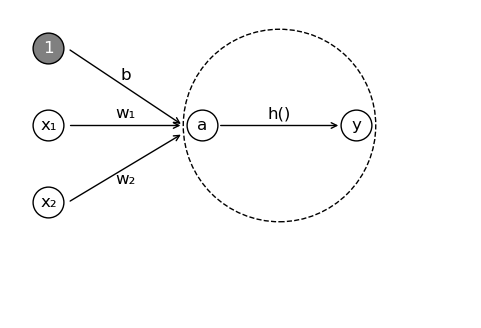

In [50]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

# 创建画布
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, 12)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.axis('off')  # 隐藏坐标轴

# -----------------------
# 定义节点位置
# -----------------------
# 偏置节点(1)
bias_pos = (1, 7)
# x1节点
x1_pos = (1, 5)
# x2节点
x2_pos = (1, 3)
# a节点（加权和）
a_pos = (5, 5)
# y节点
y_pos = (9, 5)

# -----------------------
# 绘制节点
# -----------------------
# 偏置节点
circle_bias = Circle(bias_pos, 0.4, color='gray', ec='black')
ax.add_patch(circle_bias)
ax.text(bias_pos[0], bias_pos[1], '1', fontsize=12, ha='center', va='center', color='white')

# x1节点
circle_x1 = Circle(x1_pos, 0.4, fc='white', ec='black')
ax.add_patch(circle_x1)
ax.text(x1_pos[0], x1_pos[1], 'x₁', fontsize=12, ha='center', va='center')

# x2节点
circle_x2 = Circle(x2_pos, 0.4, fc='white', ec='black')
ax.add_patch(circle_x2)
ax.text(x2_pos[0], x2_pos[1], 'x₂', fontsize=12, ha='center', va='center')

# a节点
circle_a = Circle(a_pos, 0.4, fc='white', ec='black')
ax.add_patch(circle_a)
ax.text(a_pos[0], a_pos[1], 'a', fontsize=12, ha='center', va='center')

# y节点
circle_y = Circle(y_pos, 0.4, fc='white', ec='black')
ax.add_patch(circle_y)
ax.text(y_pos[0], y_pos[1], 'y', fontsize=12, ha='center', va='center')

# 绘制包围 a 和 y 的大圆圈(包括 a、y 和它们之间的箭头)
big_circle = Circle(((a_pos[0] + y_pos[0]) / 2.0, (a_pos[1] + y_pos[1]) / 2.0), 
                    2.5, fill=False, ec='black', linestyle='--')
ax.add_patch(big_circle)

# -----------------------
# 绘制箭头函数
# -----------------------
def draw_arrow(start, end, label=None, label_offset=(0,0)):
    arrow = FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=10)
    ax.add_patch(arrow)
    if label:
        mx = (start[0] + end[0]) / 2.0 + label_offset[0]
        my = (start[1] + end[1]) / 2.0 + label_offset[1]
        ax.text(mx, my, label, fontsize=12, ha='center', va='center')

# -----------------------
# 绘制箭头
# -----------------------

# 偏置到a
draw_arrow((bias_pos[0]+0.5, bias_pos[1]), (a_pos[0]-0.5, a_pos[1]), label='b', label_offset=(0,0.3))

# x1到a（去掉上下偏移，使箭头水平指向a节点）
draw_arrow((x1_pos[0]+0.5, x1_pos[1]), (a_pos[0]-0.5, a_pos[1]), label='w₁', label_offset=(0,0.3))

# x2到a
draw_arrow((x2_pos[0]+0.5, x2_pos[1]), (a_pos[0]-0.5, a_pos[1]-0.2), label='w₂', label_offset=(0,-0.3))

# a到y (在内部箭头上标记 h() )
draw_arrow((a_pos[0]+0.4, a_pos[1]), (y_pos[0]-0.4, y_pos[1]), label='h()', label_offset=(0,0.3))

plt.show()

"神经元" 和 "节点" 两个术语的含义相同。这里, 我们称 $a$ 和 $y$ 为 "节点", 其实它和之前所说的 "神经元" 含义相同。

### Sigmoid 函数

$$
h(x) = \frac{1}{1 + e^{-x}}
$$

* 输出范围：(0, 1)
* 优点：
  将输入压缩到 (0, 1)，可以视为概率。
  适合二分类任务的输出层。

* 缺点：
  梯度消失问题：输入较大或较小时，梯度接近 0。
  计算开销较大。

Sigmoid 函数的代码实现：

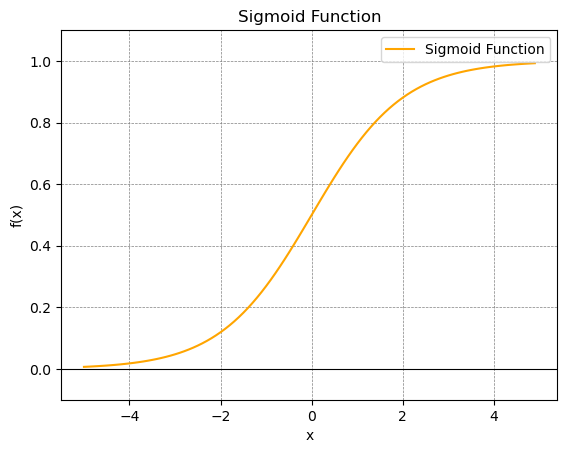

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Sigmoid 函数
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# 定义输入范围
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid_function(x)  # 调用 sigmoid 函数计算输出

# 绘制 Sigmoid 函数（隐藏竖线）
plt.plot(x, y, label="Sigmoid Function", color="orange")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-0.1, 1.1)  # 设置 y 轴范围
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# 不绘制竖线 plt.axvline(0)
plt.axhline(0, color="black", linewidth=0.8)  # 水平参考线
plt.legend()
plt.show()

In [ ]:
### 阶跃函数
阶跃函数（Step Function）是激活函数的一种类型。激活函数是神经网络中用于决定某个神经元是否“激活”的函数，而阶跃函数是激活函数的一种简单形式，具有明确的“激活”或“不激活”两个状态。


$$
h(x) =\begin{cases}
1, & \text{if } x \geq 0 \\
0, & \text{if } x < 0
\end{cases}
$$

阶跃函数的代码实现：

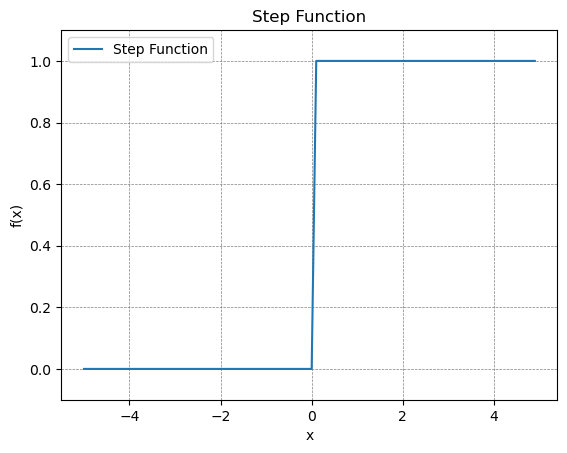

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# 定义阶跃函数
def step_function(x):
    return np.array(x > 0, dtype=int)

# 定义输入范围
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

# 绘制阶跃函数
plt.plot(x, y, label="Step Function")
plt.title("Step Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-0.1, 1.1)  # 修正 ylim 设置
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # 保留网格
# 不绘制辅助线，保留 x 和 y 数值显示
plt.legend()
plt.show()

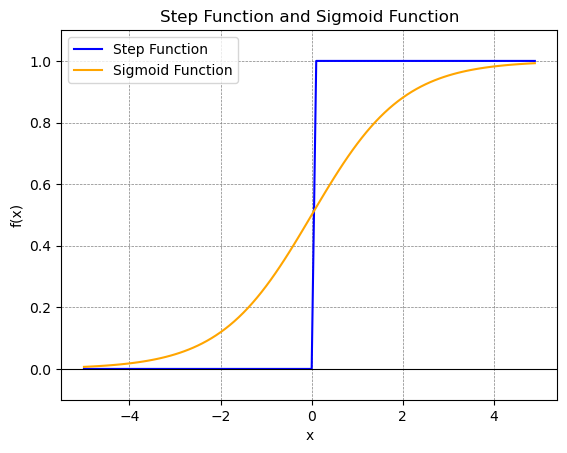

In [92]:
# 定义输入范围
x = np.arange(-5.0, 5.0, 0.1)
y_step = step_function(x)
y_sigmoid = sigmoid_function(x)

# 绘制阶跃函数和 Sigmoid 函数
plt.plot(x, y_step, label="Step Function", color="blue")
plt.plot(x, y_sigmoid, label="Sigmoid Function", color="orange")
plt.title("Step Function and Sigmoid Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-0.1, 1.1)  # 设置 y 轴范围
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color="black", linewidth=0.8)  # 水平参考线
plt.legend()
plt.show()

### 非线性函数
阶跃函数和sigmoid函数还有其他共同点，就是两者均为非线性函数。 sigmoid函数是一条曲线，阶跃函数是一条像阶梯一样的折线，两者都属于非线性的函数。

<span style="color: red;">**神经网络的激活函数必须使用非线性函数**</span>。如果神经网络中的所有激活函数都是线性的，那么无论有多少层，整个网络的输入输出关系仍可等价为一个线性变换，从而无法增加模型的表示能力。下面给出更为严格的论证和直观解释。

线性层叠加仍为线性变换的证明

设有一个多层感知机 (Multi-Layer Perceptron, MLP)，假定每一层的计算都是线性的，即在第 $l$ 层有：

$$
\mathbf{h}^{(l)} = W^{(l)} \mathbf{h}^{(l-1)} + \mathbf{b}^{(l)},
$$

其中 $\mathbf{h}^{(l)}$ 表示第 $l$ 层的输出(激活值)，$W^{(l)}$ 和 $\mathbf{b}^{(l)}$ 分别为该层的权重矩阵和偏置向量。假设最初输入为 $\mathbf{x} = \mathbf{h}^{(0)}$，经过 $L$ 层运算，输出为 $\mathbf{y} = \mathbf{h}^{(L)}$。

如果所有层都是线性的，那么整网的计算过程为：


\begin{aligned}
\mathbf{h}^{(1)} &= W^{(1)} \mathbf{x} + \mathbf{b}^{(1)},\\
\mathbf{h}^{(2)} &= W^{(2)} \mathbf{h}^{(1)} + \mathbf{b}^{(2)} = W^{(2)}(W^{(1)}\mathbf{x} + \mathbf{b}^{(1)}) + \mathbf{b}^{(2)} \\
&= (W^{(2)}W^{(1)})\mathbf{x} + (W^{(2)}\mathbf{b}^{(1)} + \mathbf{b}^{(2)}).
\end{aligned}


继续迭代下去，对于 $L$ 层网络，我们会最终得到：

$$
\mathbf{y} = W^{(L)}W^{(L-1)} \cdots W^{(1)} \mathbf{x} + \bigl(\text{若干偏置项的线性组合}\bigr).
$$

这仍然是一个关于 $\mathbf{x}$ 的线性函数(仿射函数)。在数学上，这意味着不管你有多少层，若层与层之间只是线性映射叠加，那么最终可以将这些矩阵与偏置向量“折叠”成一个单一的线性映射。

结果是，如果激活函数是线性的（例如直接输出 $f(x)=x$），那么一个包含多层的神经网络与一个单层线性模型（单层感知器）在表达能力上是等价的。网络深度不再带来额外的表达能力的提升。

为什么需要非线性激活函数？
1. 丰富的表示能力：非线性激活函数（例如sigmoid、tanh、ReLU、Leaky ReLU、ELU等）可以将输入特征空间映射至更复杂的非线性特征空间，让神经网络能够逼近任意复杂的函数关系(在一定条件下，深度神经网络具备通用逼近能力，Universal Approximation Theorem)。
2. 分割非线性决策边界：仅靠线性函数，模型只能实现线性可分的决策边界，而现实中许多问题本质上是非线性可分的。非线性激活函数能在特征空间中实现复杂曲面，从而更好地适应和拟合复杂的训练数据。

直观解释：
**想象一个两层的神经网络，如果第二层仅仅对第一层的线性输出再线性组合，那么无论中间过程如何变化，整体仍然相当于一次线性变换**。无法利用中间层来制造新的非线性特征。因此，要让深度结构的潜力得以发挥，需要利用非线性激活函数，使得特征变换不再是单纯的线性变换，而是包含弯折、挤压或截断等非线性操作，从而获得更加强大的特征提取和函数逼近能力。

结论：
因此，神经网络激活函数的非线性特性是实现深度学习强大表达能力的关键。**如果所有的激活函数都是线性的，那么即使你的网络结构再复杂，最终也只是一个简单的线性变换模型，不可能获得深层网络所蕴含的强大学习与表达能力**。

### ReLU函数
ReLU（Rectified Linear Unit）函数：

$$
h(x) = \max(0, x)
$$

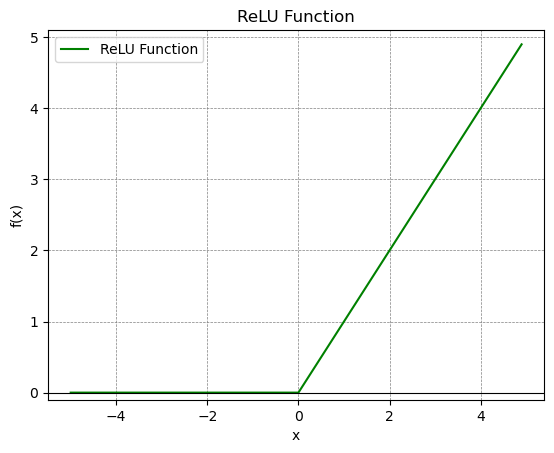

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 ReLU 函数
def relu(x):
    return np.maximum(0, x)

# 定义输入范围
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

# 绘制 ReLU 函数
plt.plot(x, y, label="ReLU Function", color="green")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-0.1, 5.1)  # 设置 y 轴范围
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color="black", linewidth=0.8)  # 水平参考线
plt.legend()
plt.show()

### 神经网络的内积

In [12]:
import numpy as np
X = np.array([1, 2])
X.shape
W = np.array([[1,3,5], [2,4,6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 三层神经网络的实现

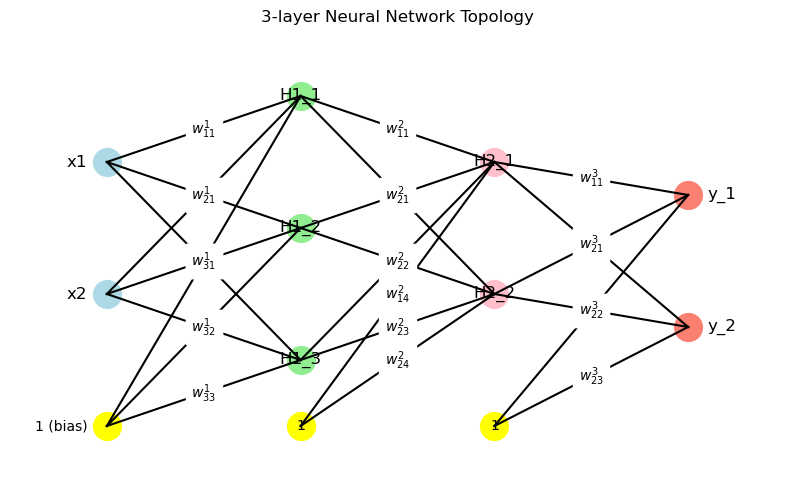

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# 为了方便，我们固定各层节点的坐标位置
# x坐标按层放置：input=0, hidden1=1, hidden2=2, output=3
x_positions = [0, 1, 2, 3]

# 定义各层节点的y坐标
# 输入层（2输入+1偏置），我们从上到下依次是x1, x2, bias
input_layer_y = [0.5, -0.5, -1.5]
hidden1_layer_y = [1, 0, -1]
hidden2_layer_y = [0.5, -0.5]
output_layer_y = [0.25, -0.75]

# 绘制节点：用圆表示神经元，用方框/三角形标记bias一般没问题，但这里统一用圆形，最后一个是bias。
# 输入层
for i, y in enumerate(input_layer_y):
    if i < 2:
        ax.plot(x_positions[0], y, 'o', color='lightblue', markersize=20)
        ax.text(x_positions[0]-0.1, y, f"x{i+1}", ha='right', va='center', fontsize=12)
    else:
        ax.plot(x_positions[0], y, 'o', color='yellow', markersize=20)
        ax.text(x_positions[0]-0.1, y, "1 (bias)", ha='right', va='center', fontsize=10)

# 第一隐含层
for i, y in enumerate(hidden1_layer_y):
    ax.plot(x_positions[1], y, 'o', color='lightgreen', markersize=20)
    ax.text(x_positions[1], y, f"H1_{i+1}", ha='center', va='center', fontsize=12)

# 在第二隐含层前再加一行偏置节点
# 第二隐含层有2个节点，但他们输入有偏置，偏置不是单独画成节点在上一层，而是这层计算时加的偏置输入。
# 我们可以用类似的方法在图中加一个偏置节点在hidden2层的下方。
for i, y in enumerate(hidden2_layer_y):
    ax.plot(x_positions[2], y, 'o', color='pink', markersize=20)
    ax.text(x_positions[2], y, f"H2_{i+1}", ha='center', va='center', fontsize=12)

# 输出层
for i, y in enumerate(output_layer_y):
    ax.plot(x_positions[3], y, 'o', color='salmon', markersize=20)
    ax.text(x_positions[3]+0.1, y, f"y_{i+1}", ha='left', va='center', fontsize=12)

# 添加层间连接线并标注权重
# 从输入层到第一隐含层: W^(1) 维度 3x3
for i_h, y_h in enumerate(hidden1_layer_y, start=1):
    for j_in, y_in in enumerate(input_layer_y, start=1):
        line = ax.plot([x_positions[0], x_positions[1]], [y_in, y_h], 'k-')
        # 在连线中间标注权重w_ij^(1)
        mid_x = (x_positions[0]+x_positions[1])/2
        mid_y = (y_in+y_h)/2
        ax.text(mid_x, mid_y, f"$w_{{{i_h}{j_in}}}^{(1)}$", ha='center', va='center', fontsize=10, backgroundcolor='white')

# 从第一隐含层到第二隐含层: W^(2) 维度 2x4
# Hidden1输出有3节点 + 1偏置 = 4 输入给第二隐含层
# 我们先在图中画第二隐含层的偏置节点(虚拟显示)
bias_h2_y = -1.5
ax.plot(x_positions[1], bias_h2_y, 'o', color='yellow', markersize=20)
ax.text(x_positions[1], bias_h2_y, "1", ha='center', va='center', fontsize=10)

for i_h2, y_h2 in enumerate(hidden2_layer_y, start=1):
    # 从 H^(1)的3节点+偏置(共4个) 到 H^(2)的第i_h2个节点
    for j_h1, y_h1 in enumerate(hidden1_layer_y + [bias_h2_y], start=1):
        ax.plot([x_positions[1], x_positions[2]], [y_h1, y_h2], 'k-')
        mid_x = (x_positions[1]+x_positions[2])/2
        mid_y = (y_h1+y_h2)/2
        ax.text(mid_x, mid_y, f"$w_{{{i_h2}{j_h1}}}^{(2)}$", ha='center', va='center', fontsize=10, backgroundcolor='white')

# 从第二隐含层到输出层: W^(3) 维度 2x3
# H^(2)有2节点 + 1偏置 = 3输入给输出层
bias_out_y = -1.5
ax.plot(x_positions[2], bias_out_y, 'o', color='yellow', markersize=20)
ax.text(x_positions[2], bias_out_y, "1", ha='center', va='center', fontsize=10)

for i_out, y_out in enumerate(output_layer_y, start=1):
    for j_h2, y_h2 in enumerate(hidden2_layer_y + [bias_out_y], start=1):
        ax.plot([x_positions[2], x_positions[3]], [y_h2, y_out], 'k-')
        mid_x = (x_positions[2]+x_positions[3])/2
        mid_y = (y_h2+y_out)/2
        ax.text(mid_x, mid_y, f"$w_{{{i_out}{j_h2}}}^{(3)}$", ha='center', va='center', fontsize=10, backgroundcolor='white')

ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-2, 1.5)
plt.title("3-layer Neural Network Topology")
plt.show()

上面是一个示意性的三层神经网络示图与对应的数学表示。该网络结构如下：

* 输入层：输入为二维向量  $X = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ ，加上偏置项 1 后得到输入向量 $\tilde{X} = \begin{bmatrix} x_1 \\ x_2 \\ 1 \end{bmatrix}$。

* 第一隐含层（Hidden Layer 1）：有 3 个神经元，每个神经元都会接收来自 $\tilde{X}$ 的信号。

* 第二隐含层（Hidden Layer 2）：有 2 个神经元，每个神经元接收来自第一隐含层输出及偏置的信息。

* 输出层（Output Layer）：输出为 2 维向量  $Y = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$ 。

### 权值表示方式

从输入到第一隐含层的权值矩阵表示为  $W^{(1)}$ ，它的维度是 3 $\times$ 3（3个隐含节点，每个节点对应输入2个特征+1个偏置，共3个输入）。

从第一隐含层到第二隐含层的权值矩阵为  $W^{(2)}$ ，它的维度是 2 $\times$ 4（2个隐含节点，每个节点对应第一隐含层3个输出+1个偏置，共4个输入）。

从第二隐含层到输出层的权值矩阵为  $W^{(3)}$ ，它的维度是 2 $\times$ 3（2个输出节点，每个对应第二隐含层2个输出+1个偏置，共3个输入）。

### 网络计算流程（列向量输入、左侧权重）

1. 输入向量（含偏置）：

$\tilde{X} = \begin{bmatrix} x_1 \\ x_2 \\ 1 \end{bmatrix}$

2. 第一隐含层加权求和（<span style="color: red;">**未加激活**</span>前）：

$Z^{(1)} = W^{(1)} \tilde{X}$

其中  $W^{(1)}$  为 $3 \times 3$ 矩阵，如：

$$
W^{(1)} = \begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} \\
w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} \\
w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)}
\end{bmatrix}
$$

3. 第一隐含层输出（假设使用某种<span style="color: red;">**激活函数**</span>  $f(\cdot)$ , 如 ReLU 或 sigmoid）：

$$
H^{(1)} = f(Z^{(1)})
= \begin{bmatrix}
f(z_1^{(1)}) \\ f(z_2^{(1)}) \\ f(z_3^{(1)})
\end{bmatrix}
$$

然后加入偏置项成为输入给下一层：

$$
\tilde{H}^{(1)} = \begin{bmatrix} H^{(1)} \\ 1 \end{bmatrix}
= \begin{bmatrix}
f(z_1^{(1)}) \\ f(z_2^{(1)}) \\ f(z_3^{(1)}) \\ 1
\end{bmatrix}
$$

4. 第二隐含层加权求和：

$$
Z^{(2)} = W^{(2)} \tilde{H}^{(1)}
$$

其中  $W^{(2)}$  为  $2 \times 4$  矩阵：

$$
W^{(2)} = \begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} & w_{13}^{(2)} & w_{14}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)} & w_{23}^{(2)} & w_{24}^{(2)}
\end{bmatrix}
$$

5. 第二隐含层输出：

$$
H^{(2)} = f(Z^{(2)}) = \begin{bmatrix}
f(z_1^{(2)}) \\ f(z_2^{(2)})
\end{bmatrix}
$$

加上偏置项：

$$
\tilde{H}^{(2)} = \begin{bmatrix}
f(z_1^{(2)}) \\ f(z_2^{(2)}) \\ 1
\end{bmatrix}
$$

6. 输出层计算（<span style="color: red;">**恒等激活**</span>）：

$$
Y = W^{(3)} \tilde{H}^{(2)}
$$

其中  $W^{(3)}$  为  $2 \times 3$  矩阵：

$$
W^{(3)} = \begin{bmatrix}
w_{11}^{(3)} & w_{12}^{(3)} & w_{13}^{(3)} \\
w_{21}^{(3)} & w_{22}^{(3)} & w_{23}^{(3)}
\end{bmatrix}
$$

最终输出：

$$
Y = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}
= W^{(3)} \begin{bmatrix} f(z_1^{(2)}) \\ f(z_2^{(2)}) \\ 1 \end{bmatrix}
$$    

在上述公式中， $W^{(1)}, W^{(2)}, W^{(3)}$  等矩阵中的上标（序号）表示该权重矩阵所对应的网络层级。例如：
* $W^{(1)}$ ：从输入层到第一隐含层的权重矩阵。
* $W^{(2)}$ ：从第一隐含层到第二隐含层的权重矩阵。
* $W^{(3)}$ ：从第二隐含层到输出层的权重矩阵。

而在权重矩阵内部，有时会用下标来表示矩阵中元素的位置。例如，对于  $W^{(1)}$ ，其元素可以写成  $w_{ij}^{(1)}$ ，其中：
* 上标  $(1)$  表示该元素属于第1个权重矩阵，即<span style="color: red;">**输入层到第一隐含层的连接权重**</span>。
* 下标  $i$  通常表示输出方（层中某节点）的索引。
* 下标  $j$  通常表示输入方（上一层输出的某一维）的位置索引。

举例来说， $w_{21}^{(2)}$  中的「2」表示这是第二隐含层的权重矩阵（上标为2）的元素， $w_{21}^{(2)}$  是该矩阵中第2行、第1列的元素。这里的「行索引」(第2行)对应第二隐含层的某个神经元，「列索引」(第1列)对应上一层（第一隐含层的输出）的某个输出维度或偏置输入。

简而言之：
* 上标 (1)、(2)、(3) 用来表示权重矩阵所属的层级间连接。
* 下标  i, j  用来表示该权重矩阵中某元素行列位置，即第 i 个输出节点（或输出维度）和第 j 个输入节点（或输入维度）。
* 输出层的激活函数一般用$\sigma()$，隐藏层的激活函数一般用$h()$

### 网络计算流程（行向量输入、右侧权重）

下面给出「行向量输入、权重在右侧」的等价推导，并与之前的「列向量输入、权重在左侧」格式保持对应。为清晰起见，这里将隐藏层激活函数记为 $h(\cdot)$ （如 ReLU、sigmoid），而输出层激活函数记为 $\sigma(\cdot)$（如softmax或sigmoid，具体情况而定）。本例中以两层隐藏层为例。

1. **输入行向量（含偏置）**

与列向量模式不同，这里输入采用行向量形式。若原先是：

$$
\tilde{X} = \begin{bmatrix} x_1 \\ x_2 \\ 1 \end{bmatrix} \quad \text{(列向量)}
$$

现在变为行向量表示：

$$
X = [x_1, x_2, 1]
$$

此时，$X$ 的维度为 $1 \times 3$。

2. 第一隐含层加权求和（<span style="color: red;">**未加激活前**</span>）：

原先为 $Z^{(1)} = W^{(1)} \tilde{X}$，其中 $W^{(1)}$ 为 $3 \times 3$，$\tilde{X}$为 $3 \times 1$。

现在我们以行向量在左、权重在右的形式表示：

$$
Z^{(1)} = X W^{(1)}
$$


这里 $W^{(1)}$ 依然是一个 $3 \times 3$ 矩阵：

$$
W^{(1)} = \begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} \\
w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} \\
w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)}
\end{bmatrix}
$$

则 $Z^{(1)}$ 为 $1 \times 3$ 的行向量：

$$
Z^{(1)} = [z_1^{(1)}, z_2^{(1)}, z_3^{(1)}]
$$

3. 第一隐含层输出（使用激活函数 $h(\cdot)$ ）：

对 $Z^{(1)}$ 的每个分量施加激活函数 $h$：

$$
H^{(1)} = h(Z^{(1)}) = [h(z_1^{(1)}), h(z_2^{(1)}), h(z_3^{(1)})]
$$

加入偏置项形成下一层的输入向量：

$$
\tilde{H}^{(1)} = [h(z_1^{(1)}), h(z_2^{(1)}), h(z_3^{(1)}), 1]
$$

$\tilde{H}^{(1)}$ 的维度为 $1 \times 4$。

4. 第二隐含层加权求和：

与上一层类似，原先是  $Z^{(2)} = W^{(2)} \tilde{H}^{(1)}$ （列向量形式），
现在为行向量形式：

$$
Z^{(2)} = \tilde{H}^{(1)} W^{(2)}
$$

为保持计算一致性（$\tilde{H}^{(1)}$是 $1 \times 4$，得到 $Z^{(2)}$为 $1 \times 2，W^{(2)}$ 需为 $4 \times 2$ 矩阵：

$$
W^{(2)} = \begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)} \\
w_{31}^{(2)} & w_{32}^{(2)} \\
w_{41}^{(2)} & w_{42}^{(2)}
\end{bmatrix}
$$

此时：

$$
Z^{(2)} = [z_1^{(2)}, z_2^{(2)}]
$$

5. 第二隐含层输出（使用激活函数 $h(\cdot)$ ）：

$$
H^{(2)} = h(Z^{(2)}) = [h(z_1^{(2)}), h(z_2^{(2)})]
$$

加入偏置项：

$$
\tilde{H}^{(2)} = [h(z_1^{(2)}), h(z_2^{(2)}), 1]
$$

$\tilde{H}^{(2)}$ 为 $1 \times 3$。

6. 输出层计算（使用激活函数 $\sigma(\cdot)$ ）：

$$
Y = \tilde{H}^{(2)} W^{(3)}
$$

为实现 $(1 \times 3) \times (3 \times 2) = (1 \times 2)$ 的输出，$W^{(3)}$ 为 $3 \times 2$ 矩阵：

$$
W^{(3)} = \begin{bmatrix}
w_{11}^{(3)} & w_{12}^{(3)} \\
w_{21}^{(3)} & w_{22}^{(3)} \\
w_{31}^{(3)} & w_{32}^{(3)}
\end{bmatrix}
$$

则有：

$$
Z^{(3)} = \tilde{H}^{(2)} W^{(3)} = [z_1^{(3)}, z_2^{(3)}]
$$

输出层使用激活函数 $\sigma(\cdot)$（如softmax或sigmoid）：

$$
Y = \sigma(Z^{(3)}) = [\sigma(z_1^{(3)}), \sigma(z_2^{(3)})]
$$

### 物理意义说明

* 在「列向量输入、权重在左侧」的形式中，W 的行对应输出神经元，列对应输入特征。
* 在「行向量输入、权重在右侧」的形式中，矩阵乘法的顺序发生变化，W 的行和列角色与之前对调，W 的每一列对应一个输出单元的权重集合，每一行对应一个输入特征对所有输出单元的映射权重集合。

本质上，这只是线性代数中等价的表述方式。无论「W在左」还是「W在右」，物理意义仍是将输入特征通过线性变换映射到隐含层和输出层，只是在矩阵维度和索引方式上有所不同。

**情况1：列向量输入、权重在左侧**

在这种常见的表示方法中，我们通常将输入（含偏置）作为列向量。例如，输入向量是 $\tilde{X}$（尺寸为 $n \times 1$），权重矩阵 $W$ 为 $m \times n$ ，输出向量为 $Z = W \tilde{X}$（尺寸为 $m \times 1$）。在这里：

* $i$ 对应权重矩阵中某行的索引，指向本层的第 $i$ 个神经元（输出单元）。
* $j$ 对应权重矩阵中某列的索引，指向输入层（上一层输出）的第 $j$ 个特征/节点。

物理意义：
 $w_{ij}$  表示从上一层的第 $j$ 个输出节点（或输入特征）传递到本层的第 $i$ 个节点的权重值。换言之，权重矩阵的第 $i$ 行是对应输出神经元 $i$ 的权重向量，包含了该神经元与所有输入特征之间的连接权重；第 $j$ 列与输入特征 $j$ 有关。

总结：
1. 行 (i) → 当前层输出节点索引
2. 列 (j) → 上一层输入特征/节点索引
3. $w_{ij}$  表示「上层第 $j$ 个输入 → 本层第 $i$ 个输出」的连接强度。

**情况2：行向量输入、权重在右侧**

在这种表示方法中，我们将输入向量写成行向量  $X$  （尺寸 $1 \times n$），权重矩阵 $W$ 为 $n \times m$，输出 $Z = X W$（尺寸 $1 \times m$）。此时：

* $j$ 对应权重矩阵中的某行的索引，指向输入特征的第 $j$ 个分量。
* $i$ 对应权重矩阵中的某列的索引，指向输出层的第 $i$ 个单元。

物理意义：
 $w_{ji}$  在这里表示输入的第 $j$ 个特征对输出的第 $i$ 个单元的线性变换权重。当我们采用  $X W$  的形式时，第 $j$ 行代表输入的第 $j$ 个特征所连接到的所有输出节点的权重集合，而第 $i$ 列代表针对输出节点 $i$ 所有输入特征的权重集合。

总结：
1. 行 ($j$) → 上一层输入特征/节点索引
2. 列 ($i$) → 当前层输出节点索引
3. $w_{ji}$  表示「上层第 $j$ 个输入特征 → 本层第 $i$ 个输出节点」的连接强度。
    
### 代码示例
下面的代码示例中，我们将根据先前给出的公式，为中间层（第一隐含层和第二隐含层）的权重矩阵赋予一些合适的、相对较小的初始值（非随机，以方便展示）。

激活函数在隐含层使用sigmoid（S型函数），在输出层使用恒等映射（即不加额外激活），从而便于对最终输出进行解释和观察。

In [39]:
import numpy as np

# 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 输入向量 (示例值)
x1, x2 = 0.7, -0.3
X = np.array([x1, x2])

# 加入偏置
X_tilde = np.append(X, 1)  # [x_1, x_2, 1]

# 为权重矩阵赋值为合理的值（非随机），方便观察
# W^(1) 为 3x3 (从输入到第一隐含层)
W1 = np.array([
    [0.5,  0.1, -0.2],
    [-0.3, 0.4,  0.1],
    [0.2, -0.1,  0.3]
])

# W^(2) 为 2x4 (从第一隐含层到第二隐含层, 3输出 + 1 bias)
W2 = np.array([
    [-0.2, 0.2, 0.5, 0.1],
    [ 0.3,-0.4, 0.1,-0.1]
])

# W^(3) 为 2x3 (从第二隐含层到输出层, 2输出 + 1 bias)
W3 = np.array([
    [0.6, 0.2, -0.2],
    [-0.1,0.5,  0.3]
])

# 前向传播
# 第一隐含层计算
Z1 = W1 @ X_tilde     # (3x3) * (3x1) = (3x1)
H1 = sigmoid(Z1)      # 对Z1逐元素施加sigmoid
H1_tilde = np.append(H1, 1)   # 加偏置

# 第二隐含层计算
Z2 = W2 @ H1_tilde     # (2x4) * (4x1) = (2x1)
H2 = sigmoid(Z2)
H2_tilde = np.append(H2, 1)   # 加偏置

# 输出层计算（使用恒等激活）
Y = W3 @ H2_tilde       # (2x3) * (3x1) = (2x1)

print("输入: X =", X)
print("第一隐含层Z1 =", Z1)
print("第一隐含层H1 =", H1)
print("第二隐含层Z2 =", Z2)
print("第二隐含层H2 =", H2)
print("输出层Y =", Y)

输入: X = [ 0.7 -0.3]
第一隐含层Z1 = [ 0.12 -0.23  0.47]
第一隐含层H1 = [0.52996405 0.44275215 0.61538376]
第二隐含层Z2 = [ 0.3902495  -0.05657327]
第二隐含层H2 = [0.59634276 0.48586045]
输出层Y = [0.25497775 0.48329595]


## 输出层的设计

在许多神经网络结构设计中，输出层是否使用激活函数取决于特定的任务和输出要求。之所以在前面示例中并未在输出层显式添加激活函数，原因可能有以下几种考虑：
	
1.	回归问题（连续值输出）：

**如果网络的任务是预测连续数值（如房价、温度、某个实数值的估计），那么常常希望输出层直接给出实数值而不受限于某个特定激活函数（如sigmoid会把输出压缩在0~1之间）。此时输出层通常为线性输出（即无激活函数），方便网络自由拟合从负无穷到正无穷的实数范围**。

2. 分类问题的后处理：

**在多分类任务中，经常会在输出层使用softmax函数以得到概率分布**。但在某些理论描述或框架代码中，可能会将softmax放在损失函数计算的步骤中（如在PyTorch或TensorFlow中，你可能只需提供未激活的线性输出给交叉熵损失函数，框架内部会自动应用softmax）。所以在模型本身的公式表示时，有时仅以线性输出结束，然后在训练或推断时在外部应用softmax。

3. 特殊模型结构：

某些模型（如对抗生成网络中的判别器或其他特定结构）在最后一层可能不需要或不希望使用标准激活函数，而是直接将特征映射到一个值中，用该值再与后续逻辑（例如损失函数）相结合。

简而言之，“输出层没有激活函数”并不是一个硬性规定，而是依据具体任务和训练过程中的策略而定。

### softmax函数

Softmax函数的数学表达式：

给定一个实数向量 $\mathbf{z} = [z_1, z_2, \ldots, z_K]$，Softmax函数将其映射为一个概率分布 $\mathbf{p} = [p_1, p_2, \ldots, p_K]$，满足 $p_i \ge 0$ 且 $\sum_i p_i = 1$。其定义为：

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}.
$$

### 为什么softmax常用于神经网络

1.	概率解释：
Softmax的输出是一个非负且总和为1的向量，因此非常适合用于多分类问题的最后一层。在这种情况下，Softmax输出可以解释为模型对于每个类别的预测概率。

2. 可导性与优化方便：
Softmax函数可微，使得通过反向传播对参数进行优化变得容易。

3. 放大差异：
Softmax可以放大最大分量与其他分量之间的差异，从而将模型倾向清晰化地表达出来。


### 防止softmax溢出

原始定义中：

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

如果 $\{z_i\}$ 中包含较大的数值，如 $z_{\text{max}} = \max_j z_j$ 很大，那么 $e^{z_i}$ 可能会数值溢出。为防止溢出，我们可以对输入进行平移，即从每个 $z_i$ 中减去最大值 $z_{\text{max}}$：

$$
\text{softmax}(z_i) = \frac{e^{z_i - z_{\max}}}{\sum_{j=1}^{K} e^{z_j - z_{\max}}}.
$$

因为 $\forall j, z_j - z_{\max} \leq 0$，这样就避免了指数项出现过于巨大的情况。

推导简要说明：
* 假设 $z_{\max} = \max_j z_j$.
* 将分子分母同时除以 $e^{z_{\max}}$:

$$
\frac{e^{z_i}}{\sum_j e^{z_j}} = \frac{e^{z_i - z_{\max}}}{\sum_j e^{z_j - z_{\max}}}.
$$

* 由于 $z_j - z_{\max} \leq 0，e^{z_j - z_{\max}}$ 至多为1，不会出现过大的指数值。

### softmax的编程实现

In [55]:
import numpy as np

def softmax(z):
    # z 为一维向量或类似结构
    shift_z = z - np.max(z)      # 减去最大值防止溢出
    exp_z = np.exp(shift_z)
    return exp_z / np.sum(exp_z)

# 示例
z = np.array([1000, 1001, 999])  # 极大值，原始softmax易溢出
p = softmax(z)
print("Softmax result:", p)
print("Sum of probabilities:", np.sum(p))

Softmax result: [0.24472847 0.66524096 0.09003057]
Sum of probabilities: 0.9999999999999999


### 输出层的神经元的数量

在设计神经网络时，输出层的维度（即输出节点的数量）往往取决于具体的任务和输出目标的类型。以下从不同类型的任务出发，对输出层数量的选择进行分析，并总结常用的设计原则。

1. **回归（Regression）任务**
* 描述：输出是一个或多个连续实数值。例如房价预测、温度预测、股票价格预测等。
* 输出层设计：
    * 如果需要预测单一连续值（如某个特定房子的价格），则输出层通常只有1个神经元，以直接得到标量输出。
	* 如果需要预测多个连续值（如同时预测房子的价格和面积、或多个未来时刻的温度），则输出层的维度等于需要预测的连续值的个数。例如需同时预测3个连续参数，则输出层设为3个神经元。

* 示例：
假设要预测一所房子的最终售价（单个值），输出层就为1。
如果要预测一所房子的售价、面积和出租回报率（3个连续值），输出层为3。

2. **二分类（Binary Classification）任务**
* 描述：输出是一个二元类别标签（如垃圾邮件 vs. 正常邮件，患病 vs. 健康）。
* 输出层设计：

通常设置1个输出节点，然后对输出使用sigmoid函数将其压缩在(0,1)之间，再以0.5为阈值判定类别。
或者使用2个输出节点并通过softmax得到两个类别的概率，但是对于简单的二分类，1个节点+sigmoid往往更加简洁直观。

* 示例：
垃圾邮件检测：输出层为1个节点，输出一个概率 p（代表邮件为垃圾邮件的概率）。

3. **多分类（Multi-class Classification）任务**
* 描述：输出是多个互斥类别之一（如MNIST手写数字识别有10类，分别为0-9）。
* 输出层设计：
输出层的节点数量等于类别的数量。在多分类问题中，若有K个类别，则输出层为K个神经元，并通过softmax将输出转化为概率分布，选取最大概率对应的类别为预测结果。
* 示例：
MNIST手写数字识别：10个类别（数字0-9），则输出层为10个节点。
图像分类任务（ImageNet数据集）有1000个类别，输出层就是1000个神经元。

4. **多标签分类（Multi-label Classification）任务**
* 描述：每个样本可以同时属于多个类别，而非互斥（例如对一张图像进行多标签标注：图片中既有猫又有狗，又有树）。
* 输出层设计：
输出层的数量等于标签的总数量，每个节点通过sigmoid独立输出属于该标签的概率。
例如有M个可能标签，则输出层为M个神经元。每个输出节点独立的表示该标签是否存在的概率。
* 示例：
图像多标签分类（标签集：{猫, 狗, 树, 房子, 人}共5个标签）：输出层为5个节点，每个节点sigmoid输出对应标签存在的概率。

5. **序列预测（Sequence Prediction）任务**
* 描述：输出是一个序列或特征向量，比如机器翻译中对每个词进行预测、语音识别中对每个帧的音素预测等。
* 输出层设计：
如果是每个时间步都要输出一个类别或者值，则输出层的大小在每个时间步与前述分类、回归设置类似。
对自然语言处理任务（如词级预测），输出层数量通常等于词汇表大小（Vocabulary Size）。
* 示例：
语言模型：给定上文预测下一个词，词典中有10000个单词，则输出层为10000个节点，每次通过softmax得到每个词出现的概率。

6. **特征提取或表示学习**
* 描述：在有些深度学习应用中，网络最后想要的不是分类或回归结果，而是一个特征表示向量（embedding）。
* 输出层设计：
此时输出层节点数量决定了所学表示（embedding）的维度，取决于需要的表示空间大小。
* 示例：
图像的特征向量用于检索或下游任务中，可能选择输出维度为128, 256或1024等的向量。

**总结原则**：
1. 回归问题：输出层大小 = 所需预测的连续值的数量。
2. 二分类问题：通常输出层为1个节点（sigmoid），或2个节点（softmax）较少用但可行。
3. 多分类问题（互斥类别）：输出层大小 = 类别数。并配合softmax作概率解释。
4. 多标签分类（非互斥类别）：输出层大小 = 标签总数，每个输出独立进行sigmoid激活。
5. 序列预测：输出层大小取决于每个时间步的预测需求，如果是词预测，输出层大小 = 词表大小。
6. 特征表示：输出层大小 = 所需的特征维度，由任务需求决定。

选择输出层的节点数量时要紧紧围绕任务需求来定：输出层维度应恰好描述预测目标的维度和性质。

## 训练神经网络识别手写数字

代码文件层次结构如下：

RecognizeHandwrittenDigits

├── functions.py

├── mnist.pkl

├── mnist.py

├── mnist_show.py

├── neuralnet_mnist.py

├── neuralnet_mnist_batch.py

├── sample_weight.pkl

├── t10k-images-idx3-ubyte.gz

├── t10k-labels-idx1-ubyte.gz

├── train-images-idx3-ubyte.gz

└── train-labels-idx1-ubyte.gz

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
import time
from mnist import load_mnist
from functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 批数量
accuracy_cnt = 0

start_time = time.time()  # 开始计时

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

end_time = time.time()  # 结束计时

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print("Batch processing time:", end_time - start_time, "seconds")

# 非批处理代码
start_time = time.time()  # 开始计时

# 使用非批处理一次性处理整个测试集
y_batch = predict(network, x)  # 一次性预测整个测试集
p = np.argmax(y_batch, axis=1)  # 获取每个样本的预测类别
accuracy_cnt = np.sum(p == t)  # 计算预测正确的样本数

end_time = time.time()  # 结束计时

# 计算并输出准确率
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print("Non-batch processing time:", end_time - start_time, "seconds")

Accuracy:0.9352
Batch processing time: 0.047128915786743164 seconds
Accuracy:0.9352
Non-batch processing time: 0.016496896743774414 seconds


结果显示非批处理直接运算整个矩阵速度更快。